# The Project: A/B Testing Analysis of Marketing Campaigns

This project focuses on applying A/B testing methods to compare two digital marketing campaigns: a **Control group** and a **Test group**.  

## What is a KPI?

A **Key Performance Indicator (KPI)** is a measurable value that indicates how effectively a campaign achieves its objectives. In marketing, KPIs help track user engagement, conversion efficiency, and overall return on investment.  

## KPIs Used in This Project

The analysis evaluates three main KPIs:

1. **Click-Through Rate (CTR)**  
   - **Definition**: The percentage of ad impressions that result in clicks.  
   - **Formula**: `CTR = (Clicks / Impressions)`  
   - **Purpose**: Measures how engaging or attractive the ad is to users. A higher CTR indicates that the ad successfully drives traffic to the website.  

2. **Conversion Rate (CR)**  
   - **Definition**: The percentage of clicks that result in purchases.  
   - **Formula**: `CR = (Purchases / Clicks)`  
   - **Purpose**: Tracks how effectively the campaign converts website visitors into customers. A higher CR means the campaign is better at turning interest into revenue.  

3. **Revenue per Impression (RevPerImpr)**  
   - **Definition**: The revenue (or spend proxy) generated per ad impression.  
   - **Formula**: `RevPerImpr = (Spend / Impressions)`  
   - **Purpose**: Indicates the efficiency of each impression in terms of financial return. It combines both reach and cost-effectiveness to evaluate campaign profitability.  

## Project Workflow

- **Data Exploration**: Cleaning, transforming, and validating campaign performance data.  
- **KPI Calculation**: Computing CTR, CR, and RevPerImpr for both Control and Test groups.  
- **Statistical Testing**: Running hypothesis tests (z-tests, t-tests, non-parametric tests, permutation tests) to evaluate differences between groups.  
- **Visualization**: Creating charts (line plots, bar plots, error bars with confidence intervals) to illustrate performance and differences in KPIs.  

# The Dataset: Online Advertising Campaign Performance

The dataset originates from a [public Kaggle A/B testing dataset](https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset/data).
 It contains performance data from two advertising campaigns: **Control group** and **Test group**. Each file (`control_group.csv` and `test_group.csv`) includes daily campaign statistics with the following features:

- **Campaign Name**: Identifies the group (Control or Test).  
- **Date**: The date of the campaign record (in day-first format, e.g., `13.08.2019`).  
- **Spend [USD]**: Daily advertising expenditure in US dollars.  
- **# of Impressions**: Number of times the ad was shown to users.  
- **Reach**: Number of unique users who saw the ad.  
- **# of Website Clicks**: Number of clicks leading to the website.  
- **# of Searches**: Number of searches triggered by users after seeing the ad.  
- **# of View Content**: Instances of users viewing specific content after clicking.  
- **# of Add to Cart**: Number of products added to the shopping cart.  
- **# of Purchase**: Number of successful purchases made.   


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# === Normalize column names and handle missing values ===
import pandas as pd

control_path = "/content/drive/MyDrive/Portfolio datasets/AB testing/control_group.csv"
test_path    = "/content/drive/MyDrive/Portfolio datasets/AB testing/test_group.csv"

control = pd.read_csv(control_path, sep=';')
test    = pd.read_csv(test_path, sep=';')

# Explicit rename with exact column names
rename_map = {
    "Campaign Name": "Campaign",
    "Date": "Date",
    "Spend [USD]": "Spend",
    "# of Impressions": "Impression",
    "Reach": "Reach",
    "# of Website Clicks": "Click",
    "# of Searches": "Searches",
    "# of View Content": "ContentViewed",
    "# of Add to Cart": "AddToCart",
    "# of Purchase": "Purchase"
}
control.rename(columns=rename_map, inplace=True)
test.rename(columns=rename_map, inplace=True)

print("Missing values in control:\n", control.isnull().sum())
print("\nMissing values in test:\n", test.isnull().sum())

# Fill NaN with column means
for col in ["Impression","Click","Purchase","Spend","Reach","Searches","ContentViewed","AddToCart"]:
    if control[col].isnull().sum() > 0:
        control[col].fillna(control[col].mean(), inplace=True)
    if test[col].isnull().sum() > 0:
        test[col].fillna(test[col].mean(), inplace=True)

print("\nAfter filling missing values:")
print("Control:\n", control.isnull().sum())
print("Test:\n", test.isnull().sum())


# Data visualization

The visualizations consist of two main parts: a set of scatter and pie charts comparing campaign outcomes, and a second set of daily line plots with totals that highlight campaign performance over time.

## Part 1: Scatter and Pie Charts (4x2 grid)

- **Impressions vs Spend (Scatter Plot)**  
  Compares how advertising spend relates to the number of impressions for the Control and Test campaigns.

- **Clicks vs Content Viewed (Scatter Plot)**  
  Shows the relationship between the number of website clicks and the amount of content viewed, illustrating engagement differences.

- **Total Searches (Pie Chart)**  
  Displays the proportion of searches attributed to each campaign.

- **Website Clicks (Pie Chart)**  
  Compares the distribution of total website clicks between the two campaigns.

- **Content Viewed (Pie Chart)**  
  Shows the relative share of content views for each campaign.

- **Added to Cart (Pie Chart)**  
  Illustrates the proportion of products added to cart across the campaigns.

- **Amount Spent (Pie Chart)**  
  Displays the split in advertising spend between the Control and Test campaigns.

- **Purchases Made (Pie Chart)**  
  Compares the share of purchases generated by each campaign.

These plots combine relational analysis (scatter plots) and distributional comparisons (pie charts) to highlight differences between the campaigns in terms of reach, engagement, and conversions.

## Part 2: Daily Line and Total Bar Charts (4x2 grid)

Each row contains two charts for a given metric: a line plot of daily values with average reference lines, and a bar chart showing total values across the entire campaign.

- **Spend**  
  - Daily line chart shows the amount spent each day by both campaigns, including average spend lines.  
  - Bar chart compares the total spend across campaigns.

- **Purchases**  
  - Daily line chart tracks the number of purchases made per day.  
  - Bar chart compares the total number of purchases across campaigns.

- **Clicks**  
  - Daily line chart shows daily website clicks for both campaigns.  
  - Bar chart compares total clicks.

- **Searches**  
  - Daily line chart displays daily search activity driven by each campaign.  
  - Bar chart shows total searches.

Together, these visuals provide both temporal and aggregate perspectives, allowing a detailed comparison of campaign effectiveness in terms of spending, user engagement, and conversion outcomes.


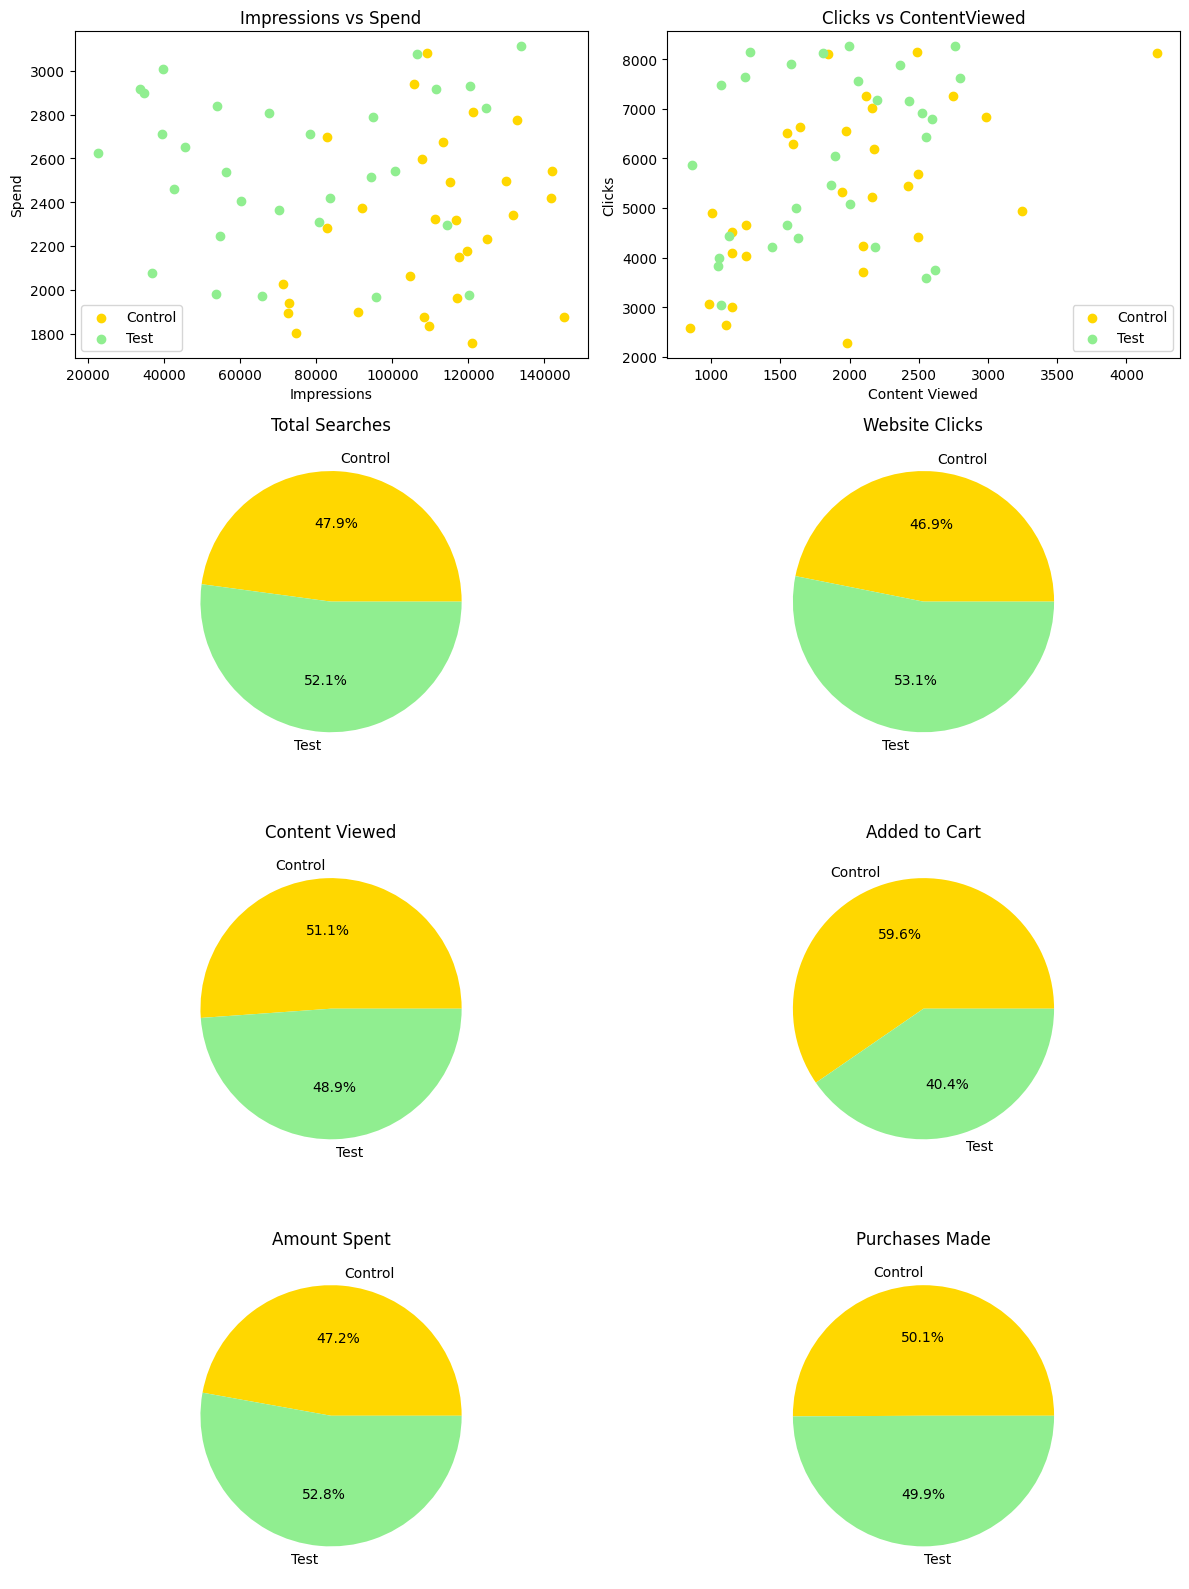

In [13]:
import matplotlib.pyplot as plt

# --- Prepare aggregated sums ---
control_sums = {
    "Searches": control["Searches"].sum(),
    "Clicks": control["Click"].sum(),
    "ContentViewed": control["ContentViewed"].sum(),
    "AddToCart": control["AddToCart"].sum(),
    "Spend": control["Spend"].sum(),
    "Purchases": control["Purchase"].sum(),
}
test_sums = {
    "Searches": test["Searches"].sum(),
    "Clicks": test["Click"].sum(),
    "ContentViewed": test["ContentViewed"].sum(),
    "AddToCart": test["AddToCart"].sum(),
    "Spend": test["Spend"].sum(),
    "Purchases": test["Purchase"].sum(),
}

# --- Create figure grid ---
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Row 1 Col 1: Scatter Impressions vs Spend
axes[0,0].scatter(control["Impression"], control["Spend"], color="gold", label="Control")
axes[0,0].scatter(test["Impression"], test["Spend"], color="lightgreen", label="Test")
axes[0,0].set_title("Impressions vs Spend")
axes[0,0].set_xlabel("Impressions")
axes[0,0].set_ylabel("Spend")
axes[0,0].legend()

# Row 1 Col 2: Scatter Clicks vs ContentViewed
axes[0,1].scatter(control["ContentViewed"], control["Click"], color="gold", label="Control")
axes[0,1].scatter(test["ContentViewed"], test["Click"], color="lightgreen", label="Test")
axes[0,1].set_title("Clicks vs ContentViewed")
axes[0,1].set_xlabel("Content Viewed")
axes[0,1].set_ylabel("Clicks")
axes[0,1].legend()

# Row 2 Col 1: Pie Searches
axes[1,0].pie([control_sums["Searches"], test_sums["Searches"]],
              labels=["Control","Test"],
              autopct='%1.1f%%', colors=["gold","lightgreen"])
axes[1,0].set_title("Total Searches")

# Row 2 Col 2: Pie Website Clicks
axes[1,1].pie([control_sums["Clicks"], test_sums["Clicks"]],
              labels=["Control","Test"],
              autopct='%1.1f%%', colors=["gold","lightgreen"])
axes[1,1].set_title("Website Clicks")

# Row 3 Col 1: Pie ContentViewed
axes[2,0].pie([control_sums["ContentViewed"], test_sums["ContentViewed"]],
              labels=["Control","Test"],
              autopct='%1.1f%%', colors=["gold","lightgreen"])
axes[2,0].set_title("Content Viewed")

# Row 3 Col 2: Pie AddToCart
axes[2,1].pie([control_sums["AddToCart"], test_sums["AddToCart"]],
              labels=["Control","Test"],
              autopct='%1.1f%%', colors=["gold","lightgreen"])
axes[2,1].set_title("Added to Cart")

# Row 4 Col 1: Pie Spend
axes[3,0].pie([control_sums["Spend"], test_sums["Spend"]],
              labels=["Control","Test"],
              autopct='%1.1f%%', colors=["gold","lightgreen"])
axes[3,0].set_title("Amount Spent")

# Row 4 Col 2: Pie Purchases
axes[3,1].pie([control_sums["Purchases"], test_sums["Purchases"]],
              labels=["Control","Test"],
              autopct='%1.1f%%', colors=["gold","lightgreen"])
axes[3,1].set_title("Purchases Made")

plt.tight_layout()
plt.show()


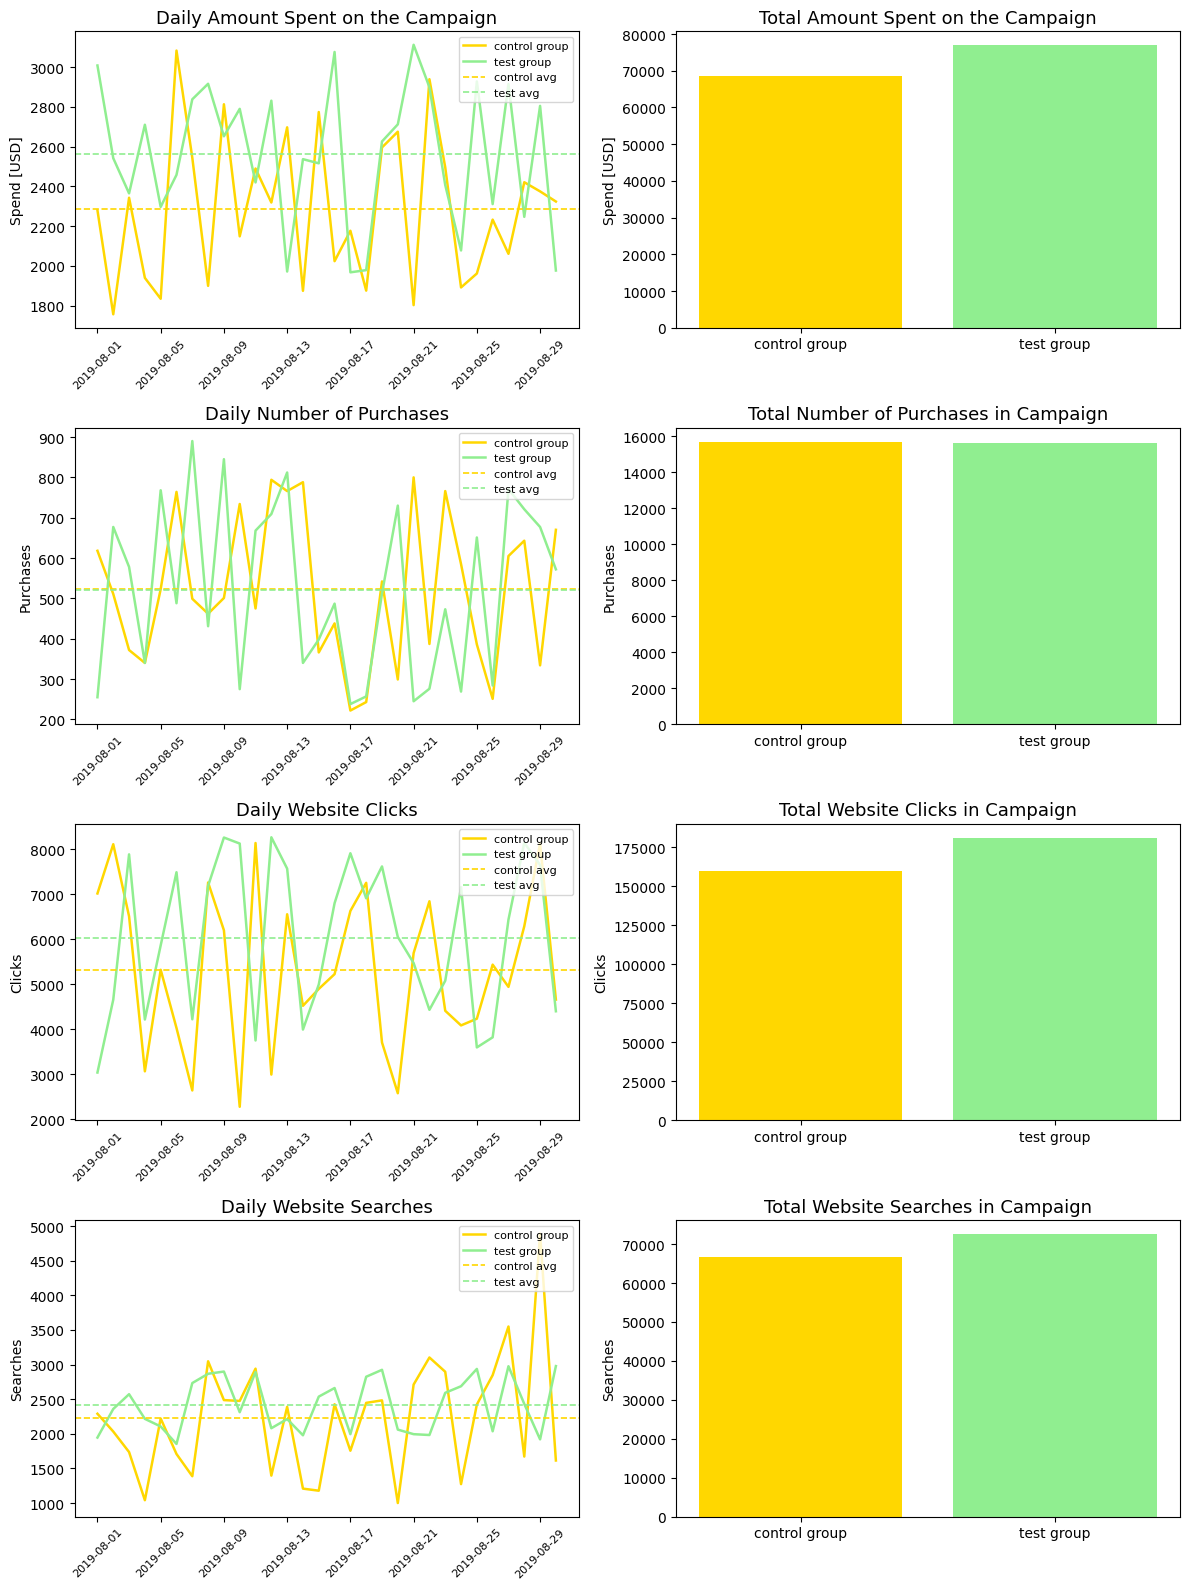

In [17]:
# === Clean Matplotlib Visuals: Spend, Purchases, Clicks, Searches ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# If control/test are not already loaded & normalized, try to normalize here
def ensure_schema(df):
    cols = {c.strip(): c for c in df.columns}
    rename_map = {}
    # Map common raw names -> normalized
    if "Campaign Name" in cols:        rename_map[cols["Campaign Name"]] = "Campaign"
    if "Date" in cols:                 rename_map[cols["Date"]] = "Date"
    if "Spend [USD]" in cols:          rename_map[cols["Spend [USD]"]] = "Spend"
    if "# of Impressions" in cols:     rename_map[cols["# of Impressions"]] = "Impression"
    if "Reach" in cols:                rename_map[cols["Reach"]] = "Reach"
    if "# of Website Clicks" in cols:  rename_map[cols["# of Website Clicks"]] = "Click"
    if "# of Searches" in cols:        rename_map[cols["# of Searches"]] = "Searches"
    if "# of View Content" in cols:    rename_map[cols["# of View Content"]] = "ContentViewed"
    if "# of Add to Cart" in cols:     rename_map[cols["# of Add to Cart"]] = "AddToCart"
    if "# of Purchase" in cols:        rename_map[cols["# of Purchase"]] = "Purchase"
    return df.rename(columns=rename_map)

# If variables 'control' and 'test' are not defined, uncomment and load:
# control_path = "/content/drive/MyDrive/Portfolio datasets/AB testing/control_group.csv"
# test_path    = "/content/drive/MyDrive/Portfolio datasets/AB testing/test_group.csv"
# control = pd.read_csv(control_path, sep=';')
# test    = pd.read_csv(test_path, sep=';')

control = ensure_schema(control)
test    = ensure_schema(test)

# Fill missing numeric values with column means (only if needed)
for df in (control, test):
    for col in ["Spend","Impression","Click","Searches","Purchase"]:
        if col in df.columns and df[col].isnull().any():
            df[col] = df[col].astype(float)
            df[col].fillna(df[col].mean(), inplace=True)

# Parse dates (dayfirst for format like '13.08.2019')
for df in (control, test):
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

# Helper to plot a metric: left = daily line with mean; right = total bar
# Helper to plot a metric: left = daily line with mean; right = total bar
def plot_metric_pair(ax_line, ax_bar, dfA, dfB, date_col, value_col, title_line, title_bar, ylabel):
    # Sort by date to avoid zig-zag lines
    dfA_sorted = dfA.sort_values(date_col)
    dfB_sorted = dfB.sort_values(date_col)

    # Daily lines
    ax_line.plot(dfA_sorted[date_col], dfA_sorted[value_col], label="control group", linewidth=1.8, color="gold")
    ax_line.plot(dfB_sorted[date_col], dfB_sorted[value_col], label="test group", linewidth=1.8, color="lightgreen")
    # Mean lines
    meanA = dfA_sorted[value_col].mean()
    meanB = dfB_sorted[value_col].mean()
    ax_line.axhline(meanA, linestyle="--", linewidth=1.2, label="control avg", color="gold")
    ax_line.axhline(meanB, linestyle="--", linewidth=1.2, label="test avg", color="lightgreen")
    ax_line.set_title(title_line, fontsize=13)
    ax_line.set_ylabel(ylabel)
    ax_line.tick_params(axis='x', rotation=45, labelsize=8)
    ax_line.legend(loc="upper right", fontsize=8)

    # Totals bar – each group its own color
    totals = [dfA_sorted[value_col].sum(), dfB_sorted[value_col].sum()]
    labels = ["control group","test group"]
    colors = ["gold","lightgreen"]
    ax_bar.bar(labels, totals, color=colors)
    ax_bar.set_title(title_bar, fontsize=13)
    ax_bar.set_ylabel(ylabel)


# Build the 4×2 grid
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# 1) Spend
plot_metric_pair(
    axes[0,0], axes[0,1],
    control, test, "Date", "Spend",
    "Daily Amount Spent on the Campaign",
    "Total Amount Spent on the Campaign",
    "Spend [USD]"
)

# 2) Purchases
plot_metric_pair(
    axes[1,0], axes[1,1],
    control, test, "Date", "Purchase",
    "Daily Number of Purchases",
    "Total Number of Purchases in Campaign",
    "Purchases"
)

# 3) Clicks
plot_metric_pair(
    axes[2,0], axes[2,1],
    control, test, "Date", "Click",
    "Daily Website Clicks",
    "Total Website Clicks in Campaign",
    "Clicks"
)

# 4) Searches
plot_metric_pair(
    axes[3,0], axes[3,1],
    control, test, "Date", "Searches",
    "Daily Website Searches",
    "Total Website Searches in Campaign",
    "Searches"
)

plt.tight_layout()
plt.show()


# A/B Testing Analysis Code

This script performs a full A/B testing analysis of two advertising campaigns: Control and Test. The workflow is organized into six main steps.

## 0. Load and Normalize
- Loads the Control and Test datasets from CSV files.
- Renames columns to simpler names for consistency.
- Parses dates in day-first format.
- Converts numerical columns to numeric types and fills missing values with column means.

## 1. KPI Calculation
- Defines three key performance indicators (KPIs) per row:
  - **CTR (Click-Through Rate)** = Clicks / Impressions
  - **CR (Conversion Rate)** = Purchases / Clicks
  - **Revenue per Impression (RevPerImpr)** = Spend / Impressions
- Adds these KPIs as new columns to both datasets.

## 2. Aggregates for Summary Table
- Computes aggregated totals and means for each KPI in both groups.
- Produces a summary DataFrame for side-by-side comparison.

## 3. Frequentist Statistical Tests
- Applies multiple hypothesis tests to compare the groups:
  - Two-proportion z-tests for CTR and CR.
  - Mann–Whitney U tests for distributional differences in CTR and CR.
  - Welch’s t-test for differences in RevPerImpr.
  - Permutation test for CTR mean difference.
- Each test records effect estimates, p-values, confidence intervals, and notes.

## 4. Multiple Testing Correction
- Applies the Holm method to adjust p-values for multiple comparisons.

## 5. Pretty Tables
- Formats the KPI summary and test results into human-readable tables without scientific notation.
- Displays metrics in percentages or decimal values as appropriate.

## 6. Charts
- Creates bar plots for CTR, CR, and RevPerImpr, comparing Control and Test groups.
- Uses Matplotlib only, with gold for Control and light green for Test.



=== KPI Aggregates (formatted) ===


,Control,Test
Impressions,"3,286,793","2,237,544"
Clicks,"159,624","180,970"
Purchases,"15,684","15,637"
Spend,"$68,653","$76,892"
CTR_mean,5.09%,10.24%
CR_mean,11.42%,9.23%
RevPerImpr_mean,0.0216,0.0427



=== Statistical Tests Summary (formatted p-values) ===


,Test,Estimate (A),Estimate (B),Diff (B-A),p-value,p-adjusted (Holm),CI95 (diff),Effect size,Notes
0,Two-proportion z-test (CTR),0.048565,0.080879,0.032314,0.000000,0.000000,"[0.031887, 0.032740]",,Large-sample approx
1,Two-proportion z-test (CR),0.098255,0.086407,-0.011848,0.000000,0.000000,"[-0.013800, -0.009897]",,Large-sample approx
2,"Mann–Whitney U (CTR, medians)",0.047884,0.080359,0.032475,0.000213,0.000425,,,Non-parametric
3,"Mann–Whitney U (CR, medians)",0.100265,0.084543,-0.015722,0.283778,0.283778,,,Non-parametric
4,Welch t-test (RevPerImpr),0.021550,0.042681,0.021131,0.000040,0.000158,"[0.012116, 0.030146]",1.2177,Welch df≈31.3
5,Permutation test (CTR mean diff),0.050879,0.102423,0.051544,0.000050,0.000158,,,Distribution-free


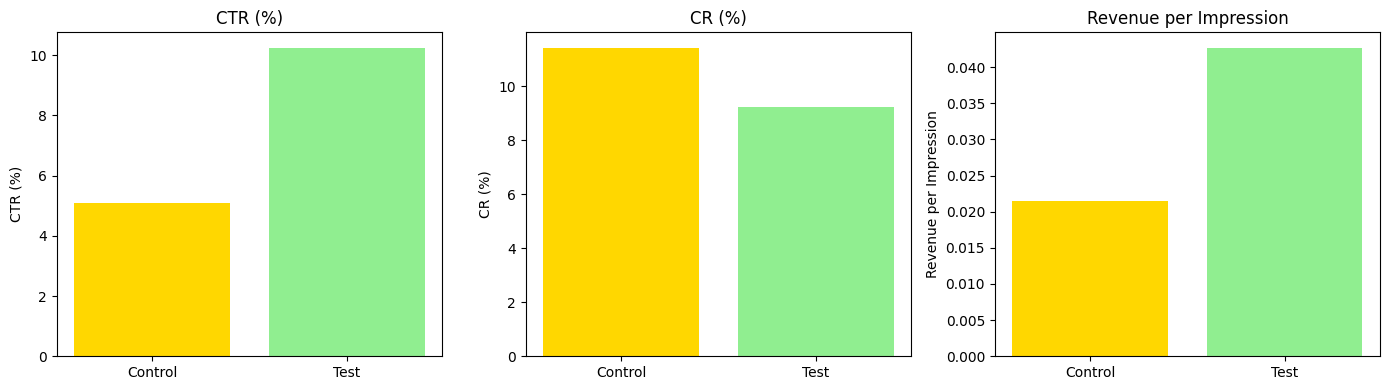

In [26]:
# === A/B Testing: Clean Cell (tables + charts, no warnings) ===
# All comments in English. Matplotlib only. No seaborn. No emojis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests
from IPython.display import display

# ----------------------------- 0) Load & Normalize -----------------------------
control_path = "/content/drive/MyDrive/Portfolio datasets/AB testing/control_group.csv"
test_path    = "/content/drive/MyDrive/Portfolio datasets/AB testing/test_group.csv"

control_raw = pd.read_csv(control_path, sep=';')
test_raw    = pd.read_csv(test_path, sep=';')

# Rename columns to simpler names
rename_map = {
    "Campaign Name": "Campaign",
    "Date": "Date",
    "Spend [USD]": "Spend",
    "# of Impressions": "Impression",
    "Reach": "Reach",
    "# of Website Clicks": "Click",
    "# of Searches": "Searches",
    "# of View Content": "ContentViewed",
    "# of Add to Cart": "AddToCart",
    "# of Purchase": "Purchase"
}
control = control_raw.rename(columns=rename_map).copy()
test    = test_raw.rename(columns=rename_map).copy()

# Parse dates (day-first format like "13.08.2019")
for df in (control, test):
    if "Date" in df.columns:
        df.loc[:, "Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

# Cast numerics and fill missing values with column means (avoid chained assignment)
num_cols = ["Spend","Impression","Click","Searches","ContentViewed","AddToCart","Purchase","Reach"]
for df in (control, test):
    for c in num_cols:
        if c in df.columns:
            df.loc[:, c] = pd.to_numeric(df[c], errors="coerce")
            if df[c].isnull().any():
                df.loc[:, c] = df[c].fillna(df[c].mean())

# ----------------------------- 1) KPIs per row -----------------------------
def add_kpis(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.loc[:, "CTR"] = np.where(df["Impression"] > 0, df["Click"] / df["Impression"], np.nan)
    df.loc[:, "CR"]  = np.where(df["Click"] > 0, df["Purchase"] / df["Click"], np.nan)
    df.loc[:, "RevPerImpr"] = np.where(df["Impression"] > 0, df["Spend"] / df["Impression"], np.nan)
    return df

control = add_kpis(control)
test    = add_kpis(test)

# ----------------------------- 2) Aggregates for summary table -----------------------------
def agg_block(d: pd.DataFrame) -> pd.Series:
    return pd.Series({
        "Impressions": d["Impression"].sum(),
        "Clicks":      d["Click"].sum(),
        "Purchases":   d["Purchase"].sum(),
        "Spend":       d["Spend"].sum(),
        "CTR_mean":    d["CTR"].mean(skipna=True),
        "CR_mean":     d["CR"].mean(skipna=True),
        "RevPerImpr_mean": d["RevPerImpr"].mean(skipna=True),
    })

summary = pd.DataFrame({"Control": agg_block(control), "Test": agg_block(test)})

# ----------------------------- 3) Frequentist tests -----------------------------
results = []

def add_result(name, estA, estB, p, ci_tuple=None, effect=None, note=""):
    results.append({
        "Test": name,
        "Estimate (A)": estA,
        "Estimate (B)": estB,
        "Diff (B-A)": (None if (estA is None or estB is None) else (estB - estA)),
        "p-value": p,
        "CI95 (diff)": ci_tuple,
        "Effect size": effect,
        "Notes": note
    })

# 3.1 Two-proportion z-test: CTR = Clicks / Impressions
clicks_A, impr_A = float(control["Click"].sum()), float(control["Impression"].sum())
clicks_B, impr_B = float(test["Click"].sum()),    float(test["Impression"].sum())
propA_CTR = clicks_A / impr_A if impr_A > 0 else np.nan
propB_CTR = clicks_B / impr_B if impr_B > 0 else np.nan

stat, p_ctr = proportions_ztest(count=[clicks_A, clicks_B], nobs=[impr_A, impr_B], alternative='two-sided')
se_ctr = sqrt(propA_CTR*(1-propA_CTR)/impr_A + propB_CTR*(1-propB_CTR)/impr_B)
ci_ctr = ((propB_CTR - propA_CTR) - 1.96*se_ctr, (propB_CTR - propA_CTR) + 1.96*se_ctr)
add_result("Two-proportion z-test (CTR)", propA_CTR, propB_CTR, float(p_ctr), ci_tuple=ci_ctr, note="Large-sample approx")

# 3.2 Two-proportion z-test: CR = Purchases / Clicks
purch_A, clks_A = float(control["Purchase"].sum()), float(control["Click"].sum())
purch_B, clks_B = float(test["Purchase"].sum()),    float(test["Click"].sum())
if clks_A > 0 and clks_B > 0:
    propA_CR = purch_A / clks_A
    propB_CR = purch_B / clks_B
    stat, p_cr = proportions_ztest(count=[purch_A, purch_B], nobs=[clks_A, clks_B], alternative='two-sided')
    se_cr = sqrt(propA_CR*(1-propA_CR)/clks_A + propB_CR*(1-propB_CR)/clks_B)
    ci_cr = ((propB_CR - propA_CR) - 1.96*se_cr, (propB_CR - propA_CR) + 1.96*se_cr)
    add_result("Two-proportion z-test (CR)", propA_CR, propB_CR, float(p_cr), ci_tuple=ci_cr, note="Large-sample approx")

# 3.3 Mann–Whitney U for per-row distributions (CTR, CR)
u_ctr, p_mw_ctr = stats.mannwhitneyu(control["CTR"].dropna(), test["CTR"].dropna(), alternative="two-sided")
add_result("Mann–Whitney U (CTR, medians)", float(control["CTR"].median()), float(test["CTR"].median()), float(p_mw_ctr), note="Non-parametric")

if control["CR"].notna().any() and test["CR"].notna().any():
    u_cr, p_mw_cr = stats.mannwhitneyu(control["CR"].dropna(), test["CR"].dropna(), alternative="two-sided")
    add_result("Mann–Whitney U (CR, medians)", float(control["CR"].median()), float(test["CR"].median()), float(p_mw_cr), note="Non-parametric")

# 3.4 Welch t-test for RevPerImpr (continuous)
a = control["RevPerImpr"].dropna().to_numpy(dtype=float)
b = test["RevPerImpr"].dropna().to_numpy(dtype=float)
t_stat, p_rev = stats.ttest_ind(a, b, equal_var=False)

na, nb = len(a), len(b)
sa2, sb2 = np.var(a, ddof=1), np.var(b, ddof=1)
se = sqrt(sa2/na + sb2/nb)
df = (sa2/na + sb2/nb)**2 / ((sa2**2)/(na**2*(na-1)) + (sb2**2)/(nb**2*(nb-1)))
tcrit = stats.t.ppf(0.975, df)
diff = b.mean() - a.mean()
ci_rev = (diff - tcrit*se, diff + tcrit*se)

sp = sqrt(((na-1)*sa2 + (nb-1)*sb2) / (na+nb-2)) if (na+nb-2) > 0 else np.nan
d = (b.mean() - a.mean()) / sp if sp and sp > 0 else np.nan
J = 1 - (3/(4*(na+nb)-9)) if (na+nb) > 9 else 1.0
hedges_g = d * J if d == d else np.nan
add_result("Welch t-test (RevPerImpr)", float(a.mean()), float(b.mean()), float(p_rev), ci_tuple=ci_rev, effect=float(hedges_g) if hedges_g == hedges_g else np.nan, note=f"Welch df≈{df:.1f}")

# 3.5 Permutation test (CTR mean difference)
def permutation_pvalue(x, y, n_perm=20000, seed=42):
    rng = np.random.default_rng(seed)
    x = np.asarray(x, dtype=float); y = np.asarray(y, dtype=float)
    obs = y.mean() - x.mean()
    combined = np.concatenate([x, y])
    nx = len(x)
    count = 0
    for _ in range(n_perm):
        rng.shuffle(combined)
        xs = combined[:nx]
        ys = combined[nx:]
        if abs(ys.mean() - xs.mean()) >= abs(obs):
            count += 1
    return (count + 1) / (n_perm + 1)

p_perm_ctr = permutation_pvalue(control["CTR"].dropna().values, test["CTR"].dropna().values, n_perm=20000)
add_result("Permutation test (CTR mean diff)", float(control["CTR"].mean()), float(test["CTR"].mean()), float(p_perm_ctr), note="Distribution-free")

# ----------------------------- 4) Multiple testing correction -----------------------------
df_results = pd.DataFrame(results)
if not df_results.empty:
    _, p_adj, _, _ = multipletests(df_results["p-value"].values, method="holm")
    df_results = df_results.copy()
    df_results.loc[:, "p-adjusted (Holm)"] = p_adj

# ----------------------------- 5) Pretty tables (no scientific notation) -----------------------------
def format_summary_table(df: pd.DataFrame) -> pd.DataFrame:
    fmt_map = {
        "Impressions": lambda x: f"{x:,.0f}",
        "Clicks":      lambda x: f"{x:,.0f}",
        "Purchases":   lambda x: f"{x:,.0f}",
        "Spend":       lambda x: f"${x:,.0f}",
        "CTR_mean":    lambda x: f"{x:.2%}",
        "CR_mean":     lambda x: f"{x:.2%}",
        "RevPerImpr_mean": lambda x: f"{x:.4f}",
    }
    # Build a new dict of formatted rows
    formatted = {}
    for col in df.columns:
        formatted[col] = []
        for idx, val in df[col].items():
            if idx in fmt_map:
                formatted[col].append(fmt_map[idx](val))
            else:
                formatted[col].append(val)
    return pd.DataFrame(formatted, index=df.index, dtype=object)


print("\n=== KPI Aggregates (formatted) ===")
summary_pretty = format_summary_table(summary)
display(summary_pretty)

print("\n=== Statistical Tests Summary (formatted p-values) ===")

def fmt_ci(ci):
    if ci is None or (isinstance(ci, float) and np.isnan(ci)):
        return ""
    lo, hi = ci
    # Always show with 6 decimals, plain format
    return f"[{lo:.6f}, {hi:.6f}]"

def fmt_plain(x, decimals=6):
    """Format numbers with fixed decimals, no scientific notation."""
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return ""
    try:
        return f"{x:.{decimals}f}"
    except Exception:
        return str(x)

cols_base = [
    "Test","Estimate (A)","Estimate (B)","Diff (B-A)",
    "p-value","p-adjusted (Holm)","CI95 (diff)","Effect size","Notes"
]
present_cols = [c for c in cols_base if c in df_results.columns]

df_show_fmt = pd.DataFrame()
if "Test" in present_cols:
    df_show_fmt["Test"] = df_results["Test"].astype(str)
if "Estimate (A)" in present_cols:
    df_show_fmt["Estimate (A)"] = df_results["Estimate (A)"].apply(lambda x: fmt_plain(x, 6))
if "Estimate (B)" in present_cols:
    df_show_fmt["Estimate (B)"] = df_results["Estimate (B)"].apply(lambda x: fmt_plain(x, 6))
if "Diff (B-A)" in present_cols:
    df_show_fmt["Diff (B-A)"] = df_results["Diff (B-A)"].apply(lambda x: fmt_plain(x, 6))
if "p-value" in present_cols:
    df_show_fmt["p-value"] = df_results["p-value"].apply(lambda x: fmt_plain(x, 6))
if "p-adjusted (Holm)" in present_cols:
    df_show_fmt["p-adjusted (Holm)"] = df_results["p-adjusted (Holm)"].apply(lambda x: fmt_plain(x, 6))
if "CI95 (diff)" in present_cols:
    df_show_fmt["CI95 (diff)"] = df_results["CI95 (diff)"].apply(fmt_ci)
if "Effect size" in present_cols:
    df_show_fmt["Effect size"] = df_results["Effect size"].apply(lambda x: "" if (x is None or (isinstance(x, float) and np.isnan(x))) else fmt_plain(x, 4))
if "Notes" in present_cols:
    df_show_fmt["Notes"] = df_results["Notes"].astype(str)

display(df_show_fmt[present_cols])


# ----------------------------- 6) Charts (Matplotlib only) -----------------------------
# 6.1 KPI bars: CTR, CR, RevPerImpr (two colors: Control=gold, Test=lightgreen)
metrics = [
    ("CTR_mean", "CTR (%)", 100.0),
    ("CR_mean", "CR (%)", 100.0),
    ("RevPerImpr_mean", "Revenue per Impression", 1.0),
]
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
colors = ["gold", "lightgreen"]
for ax, (row_name, title, factor) in zip(axes, metrics):
    vals = [summary.loc[row_name, "Control"] * factor, summary.loc[row_name, "Test"] * factor]
    ax.bar(["Control","Test"], vals, color=colors)
    ax.set_title(title)
    ax.set_ylabel(title)
    ax.ticklabel_format(style='plain', axis='y')  # avoid scientific notation
plt.tight_layout()
plt.show()


# A/B Testing Results

## KPI Aggregates
- **Impressions**: Control delivered 3.29M impressions, more than the Test group (2.24M).
- **Clicks**: Test generated 181K clicks, higher than Control’s 160K, despite fewer impressions.
- **Purchases**: Both groups achieved nearly the same number of purchases (~15.7K each).
- **Spend**: Test spent more ($76.9K) than Control ($68.7K).
- **CTR (Click-Through Rate)**: Test had a much higher average CTR (10.24%) compared to Control (5.09%).
- **CR (Conversion Rate)**: Control converted clicks to purchases more effectively (11.42% vs. 9.23%).
- **Revenue per Impression**: Test achieved a higher value per impression (0.0427 vs. 0.0216).

## Statistical Tests
- **CTR (Two-proportion z-test)**: Test’s CTR is significantly higher than Control’s (p < 0.001).
- **CR (Two-proportion z-test)**: Control’s CR is significantly higher than Test’s (p < 0.001).
- **Mann–Whitney U (CTR)**: Confirms CTR median difference is significant.
- **Mann–Whitney U (CR)**: CR median difference is not statistically significant (p ≈ 0.28).
- **Welch t-test (RevPerImpr)**: Shows Test has significantly higher RevPerImpr (p < 0.001), with a large effect size (Hedges’ g ≈ 1.22).
- **Permutation test (CTR)**: Confirms the CTR difference is significant under distribution-free assumptions.

## Interpretation
- The **Test campaign** is better at attracting clicks and generates more revenue per impression, but at a higher cost.
- The **Control campaign** is more efficient at converting clicks into purchases.
- Overall, Test may be stronger for maximizing visibility and engagement, while Control is more effective for purchase conversion efficiency.
